In [ ]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/Fake.csv")

In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(21417,23481,-1):
  data_true.drop([i],axis=0, inplace=True)

data_fake_manual_testing = data_fake.tail(10)
for i in range(21417,23481,-1):
  data_fake.drop([i],axis=0,inplace=True)

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing,data_true_manual_testing])
data_manual_testing.to_csv("manual_testing.csv")

In [ ]:
data_merge = pd.concat([data_fake,data_true])
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


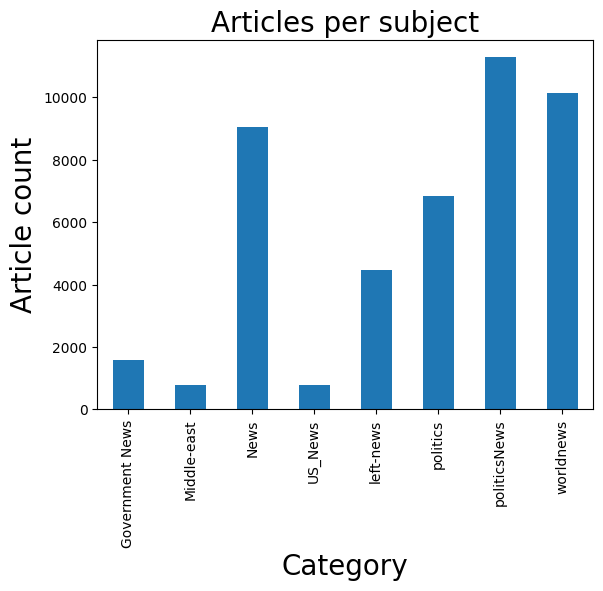

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count", size=20)
plt.show()

class
0    23481
1    21417
Name: text, dtype: int64
0= Fake news
1= True news


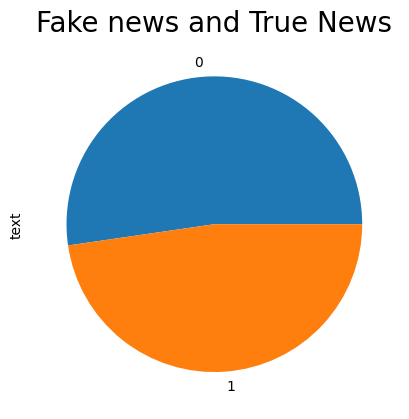

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0= Fake news\n1= True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News", size=20)
plt.show()

In [ ]:
data = data_merge.drop(["title","subject","date"],axis=1)
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
data=data.sample(frac=1)
data.head(10)

,text,class
5972,The media hyped the fact that Donald Trump use...,0
2054,One of the selling points of Donald Trump s Su...,0
1026,"On Saturday, Green Party candidate Jill Stein ...",0
15340,BEIRUT (Reuters) - Syria s army and allies inc...,1
3592,(Reuters) - Vermont’s governor on Wednesday ha...,1
17417,"MOMBASA, Kenya (Reuters) - Kenyan opposition l...",1
10268,BUENOS AIRES (Reuters) - Celeste Perosino was ...,1
15619,BRUSSELS (Reuters) - A Belgian judge has grant...,1
23091,Join Patrick every Wednesday at Independent T...,0
7571,"Over the past few months, McDonalds has been a...",0


In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text']=data['text'].apply(filtering)
data.head(10)

,text,class
5972,the media hyped the fact that donald trump use...,0
2054,one of the selling points of donald trump s su...,0
1026,on saturday green party candidate jill stein ...,0
15340,beirut reuters syria s army and allies inc...,1
3592,reuters vermont s governor on wednesday ha...,1
17417,mombasa kenya reuters kenyan opposition l...,1
10268,buenos aires reuters celeste perosino was ...,1
15619,brussels reuters a belgian judge has grant...,1
23091,join patrick every wednesday at independent t...,0
7571,over the past few months mcdonalds has been a...,0


In [ ]:
x=data["text"]
y=data["class"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split # Import train_test_split


X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data


vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)

LR = LogisticRegression()
LR.fit(xv_train, y_train)


pred_lr = LR.predict(xv_test)

print(classification_report(y_test, pred_lr))

new_text = ["modi is not pm of india"]
new_text_vectorized = vectorization.transform(new_text)
prediction = LR.predict(new_text_vectorized)

if prediction[0] == 0:
    print("Fake News.")
else:
    print("True News.")


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.98      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Fake News.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

dt_classifier = DecisionTreeClassifier()

print("Shape of xv_train:", xv_train.shape)
print("Shape of y_train:", y_train.shape)


X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xv_train = vectorization.fit_transform(X_train)

dt_classifier.fit(xv_train, y_train)

Shape of xv_train: (35918, 97276)
Shape of y_train: (35918,)


DecisionTreeClassifier()

In [ ]:

dt_classifier.score(xv_test,y_test).round(2)
if prediction[0] == 0:
    print("Fake News.")
else:
    print("True News.")

Fake News.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

rf = RandomForestClassifier()


vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


rf.fit(x_train_vec, y_train)

predictions = rf.predict(x_test_vec)


print(classification_report(y_test, predictions))


if prediction[0] == 0:
    print("Fake News.")
else:
    print("True News.")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5808
           1       0.99      0.99      0.99      5417

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Fake News.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)


LR = LogisticRegression()
LR.fit(xv_train, y_train)

pred_lr = LR.predict(xv_test)




dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(xv_train, y_train)

pred_dt = dt_classifier.predict(xv_test)




rf = RandomForestClassifier()
rf.fit(xv_train, y_train)


pred_rf = rf.predict(xv_test)



new_text = ["modi is not pm of india"]
new_text_vectorized = vectorization.transform(new_text)


prediction_lr = LR.predict(new_text_vectorized)

if prediction_lr[0] == 0:
    print("Logistic Regression: Fake News.")
else:
    print("Logistic Regression: True News.")

prediction_dt = dt_classifier.predict(new_text_vectorized)

if prediction_dt[0] == 0:
    print("Decision Tree: Fake News.")
else:
    print("Decision Tree: True News.")

prediction_rf = rf.predict(new_text_vectorized)

if prediction_rf[0] == 0:
    print("Random Forest: Fake News.")
else:
    print("Random Forest: True News.")


Logistic Regression: Fake News.
Decision Tree: Fake News.
Random Forest: Fake News.
